## EXPERIMENT 1.1: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_children_full_baseline1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_adults_bibel_baseline_1.pt'
# feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_adults_bibel_pre_cropped_baseline1_CROPPED_TEST.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [3]:
her = 2
image_names_a[her], ids_a[her], num_ids_a[her]

('m.012mmb_0001', 'm.012mmb', 2)

# Finding the right threshold

In [7]:

random_states = [4, 5, 6]
percentiles = [72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.30977622308036756
GARBE result, GARBE close to 1 means more unfair:  0.23233216731027567
Done for random_state: 4, percentile: 74
FPD result:  0.0
FND result:  0.29581286107661575
GARBE result, GARBE close to 1 means more unfair:  0.2218596458074618
Done for random_state: 4, percentile: 76
FPD result:  0.0
FND result:  0.28622496545149867
GARBE result, GARBE close to 1 means more unfair:  0.214668724088624
Done for random_state: 4, percentile: 78
FPD result:  0.0
FND result:  0.2481747571831728
GARBE result, GARBE close to 1 means more unfair:  0.1861310678873796
Done for random_state: 4, percentile: 80
FPD result:  0.0
FND result:  0.22241490044958256
GARBE result, GARBE close to 1 means more unfair:  0.16681117533718692
Done for random_state: 4, percentile: 82
FPD result:  0.0
FND result:  0.2231111508012005
GARBE result, GARBE close to 1 means more unfair:  0.16733336310090038
Done for random_state: 4, percentile: 84
FPD result:  0.0
FND result:  0.22

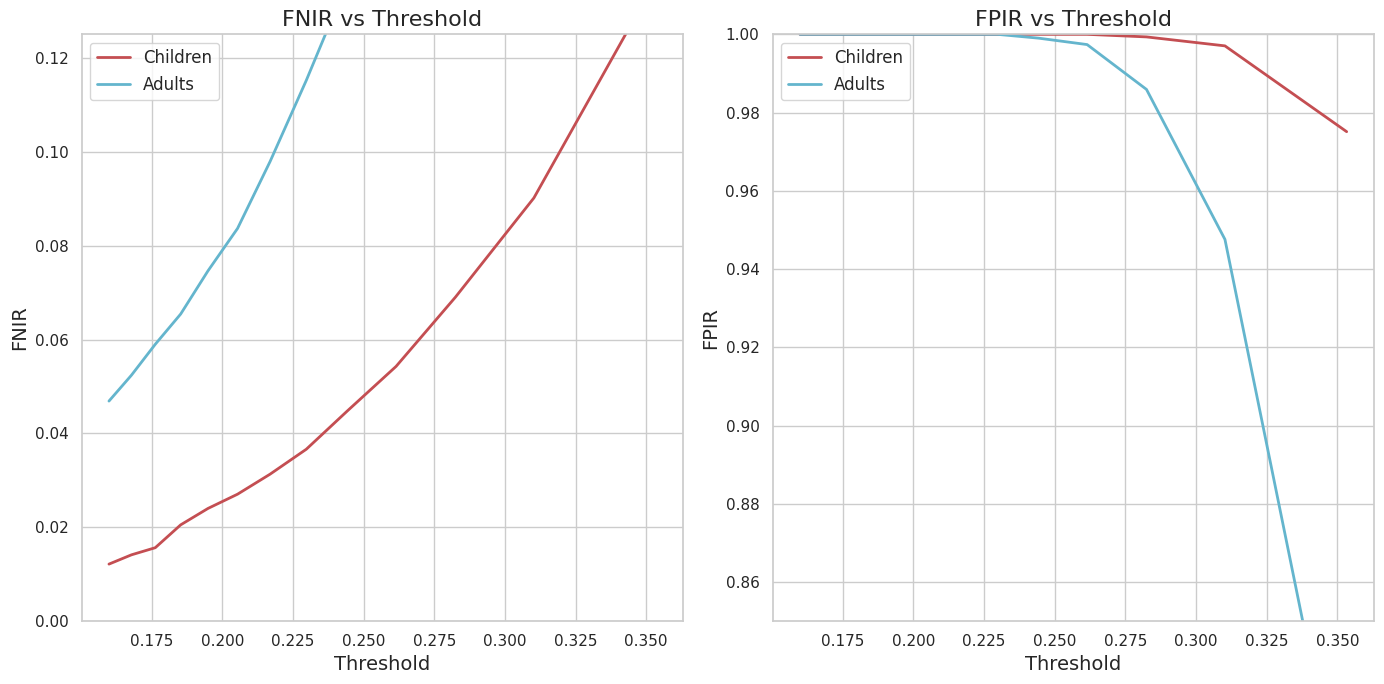

In [8]:

plot_threshold_metrics_ex_1_1(df_all_threshold_x)

# then the threshold should be based on the childrens and that would be 26.2

# Stats

In [10]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 26.2
)

df_all_results.describe().applymap(lambda x: f"{x:.3f}")

NameError: name 'evaluate_metrics_ex_1_1' is not defined

In [ ]:
df_all_results

In [ ]:
# random_states = [1,2,3,4,5,6,7,8,9,10]
# sim_mat_dict_all_magface_ex1_1 = {}
# FNIR_c_list=[]
# FNIR_a_list=[]
# FPIR_c_list=[]
# FPIR_a_list=[]
# FPD_list=[]
# FND_list=[]
# GARBE_list=[]
# threshold_list = []

# for random_state_i in random_states:

#     ### Load children and adults balanced data ###
#     children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
#     adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)



#     ### All reference image names, enrolled and non-enrolled image names - children ###
#     c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#     enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
#     enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
#     non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
#     non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
#     all_reference_image_names_c = list(children_balanced_df_i.image_name)


#     ### All reference image names, enrolled and non-enrolled image names - adults ###
#     a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#     enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
#     enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(enrolled_identity_names_a)].image_name)
#     non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
#     non_enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
#     all_reference_image_names_a = list(adults_balanced_df_i.image_name)



#     ### Similarity matrices for ids in reference database ###
#     indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
#     indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]



#     # Extract corresponding columns from the similarity matrix
#     sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]


#     sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_reference = num_ids_c[indices_c_all_reference]
#     num_ids_a_reference = num_ids_a[indices_a_all_reference]


#     ### Similarity matrices for non-enrolled ids ###
#     # Get indices of all feature and numerical id elements that are non-enrolled  ids
#     indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
#     indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]


#     # Extract corresponding rows from the similarity matrix
#     sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
#     sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
#     num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]


#     ### Similarity matrices for enrolled ids ###
#     # Get indices of all feature and numerical id elements that are enrolled ids
#     indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
#     indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

#     # Extract corresponding rows from the similarity matrix
#     sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
#     sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
#     num_ids_a_enrolled = num_ids_a[indices_a_enrolled]


#     ### DET THINGS ###

#     # thold = (np.percentile(sim_mat_c,90)+np.percentile(sim_mat_a,90))/2
#     # thold = ((np.percentile(sim_mat_c_non_enrolled_0,90) + (np.percentile(sim_mat_a_non_enrolled_0,90)))/2 + (np.percentile(sim_mat_c_enrolled_0,90) + (np.percentile(sim_mat_a_enrolled_0,90)))/2 )/2
#     # thold = np.percentile(sim_mat_a, 99)
#     thold = 0.24

#     ### Evaluation metrics ###
#     # FNIR
#     FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
#     FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)
#     # FPIR
#     FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
#     FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)




#     # OBS maybe compute Garbe outside funtion to choose a good alpha?
#     alpha_garbe = 0.25
#     FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)


#     FNIR_c_list.append(FNIR_c)
#     FNIR_a_list.append(FNIR_a)
#     FPIR_c_list.append(FPIR_c)
#     FPIR_a_list.append(FPIR_a)
#     FPD_list.append(FPD_i)
#     FND_list.append(FND_i)
#     GARBE_list.append(GARBE_i)
#     threshold_list.append(thold)

#     sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
#     sim_mat_dict_all_magface_ex1_1['sim_mat_a_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_a_enrolled
#     sim_mat_dict_all_magface_ex1_1['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled_0)
#     sim_mat_dict_all_magface_ex1_1['sim_mat_a_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_a_non_enrolled_0)


#     print("done")

# data = {
#     'Iteration': random_states,
#     'FNIR_c': FNIR_c_list,
#     'FNIR_a': FNIR_a_list,
#     'FPIR_c': FPIR_c_list,
#     'FPIR_a': FPIR_a_list,
#     'FPD': FPD_list,
#     'FND': FND_list,
#     'GARBE': GARBE_list,
#     'Threshold': threshold_list
# }
# df_all_results = pd.DataFrame(data)


# Gemmer simscores

In [ ]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


In [ ]:

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


# loader sim scores

In [ ]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv')).values.flatten()


In [ ]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:
# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)
#     plt.figure(figsize=figure_size)
#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='red', alpha=0.5, label=mated_label)
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='green', alpha=0.5, label=nonmated_label)
#         xlabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='red', alpha=0.5, label=mated_label)
#         plt.hist(nonmated_scores, bins=30, color='green', alpha=0.5, label=nonmated_label)
#         xlabel = "Count"
#     plt.xlabel("Comparison Score", size=label_fontsize)
#     plt.ylabel(xlabel, size=label_fontsize)
#     plt.grid(True)
#     plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()

import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='red', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='green', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='red', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='green', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkred', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=12)  # Replace 'label_fontsize' with 12 or any preferred size
    plt.ylabel(ylabel, size=12)  # Replace 'label_fontsize' with 12 or any preferred size
    plt.title(title, size=14)  # Title added here
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=10)  # Adjust legend parameters as needed

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()


In [ ]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 1.1 ')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 1.1 ')


# DET curves


In [ ]:
from DET_utils.DET_plots import *

In [ ]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
plt.figure(figsize=figure_size)
plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
plt.xlabel("Score", size=label_fontsize)
plt.ylabel("Probability Density", size=label_fontsize)
plt.grid(True)
plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = 0.24
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = 0.24
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()